# 1. Prerequisite

## 1.1. Modules

In [0]:
import os
from os import path
from google.colab import drive
from datetime import datetime
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import math
try:
  %tensorflow_version 1.x
except:
  pass
import tensorflow as tf


## 1.2. Path

In [50]:
now = datetime.now()
drive.mount('/content/gdrive')

notebook_path_name = './gdrive/My Drive/2019/FLEMG/공유자료함/실험/20200126'
#notebook_path_name = '각자 알아서 맞출것'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
if not path.exists(notebook_path_name):
  print('Check your google drive directory. See you file explorer')
with open(path.join(notebook_path_name, "test.txt"), "w") as f:
    f.write("test well saved!!!")

In [52]:
# Network Default with Feature-Average
flag_default_average = True
network_name = "Network_default_feature_average"
subject_name = "JYLee"
exp_time = "20200126_0425"
network_dir =  notebook_path_name + "/result"
network_dir += "/" + network_name + "/" + subject_name
if not path.exists(network_dir):
  flag_default_average = False
  print('No exp on ' + network_name + ' at ' + exp_time + " with " + subject_name)
prediction_default_average_file = network_dir + "/" + exp_time + "_test.csv"

# Network Deafult with Features
flag_default_features = True
network_name = "Network_default_features"
subject_name = "JYLee"
exp_time = "20200126_0425"
network_dir =  notebook_path_name + "/result"
network_dir += "/" + network_name + "/" + subject_name
if not path.exists(network_dir):
  flag_default_features = False
  print('No exp on ' + network_name + ' at ' + exp_time + " with " + subject_name)
prediction_default_features_file = network_dir + "/" + exp_time + "_test.csv"

# Network Feedback-flex with Feature-Average
flag_flex_average = True
network_name = "Network_feedback_flex_feature_average"
subject_name = "JYLee"
exp_time = "20200126_0425"
network_dir =  notebook_path_name + "/result"
network_dir += "/" + network_name + "/" + subject_name
if not path.exists(network_dir):
  flag_flex_average = False
  print('No exp on ' + network_name + ' at ' + exp_time + " with " + subject_name)
prediction_flex_average_file = network_dir + "/" + exp_time + "_test.csv"

# Network Feedback-flex with Features
flag_flex_features = True
network_name = "Network_feedback_flex_features"
subject_name = "JYLee"
exp_time = "20200126_0635"
network_dir =  notebook_path_name + "/result"
network_dir += "/" + network_name + "/" + subject_name
if not path.exists(network_dir):
  flag_flex_features = False
  print('No exp on ' + network_name + ' at ' + exp_time + " with " + subject_name)
prediction_flex_features_file = network_dir + "/" + exp_time + "_test.csv"

# Network Feedback-all with Feature-Average
flag_all_average = True
network_name = "Network_feedback_all_feature_average"
subject_name = "JYLee"
exp_time = "20200126_0425"
network_dir =  notebook_path_name + "/result"
network_dir += "/" + network_name + "/" + subject_name
if not path.exists(network_dir):
  flag_all_average = False
  print('No exp on ' + network_name + ' at ' + exp_time + " with " + subject_name)
prediction_all_average_file = network_dir + "/" + exp_time + "_test.csv"

# Network Feedback-all with Features
flag_all_features = True
network_name = "Network_feedback_all_features"
subject_name = "JYLee"
exp_time = "20200126_0425"
network_dir =  notebook_path_name + "/result"
network_dir += "/" + network_name + "/" + subject_name
if not path.exists(network_dir):
  flag_all_features = False
  print('No exp on ' + network_name + ' at ' + exp_time + " with " + subject_name)
prediction_all_features_file = network_dir + "/" + exp_time + "_test.csv"


# Network multiple-outputs with No feature
flag_multiple_none = True
network_name = "Network_multiple_no_feature"
subject_name = "JYLee"
exp_time = "20200126_0425"
network_dir =  notebook_path_name + "/result"
network_dir += "/" + network_name + "/" + subject_name
if not path.exists(network_dir):
  flag_multiple_none = False
  print('No exp on ' + network_name + ' at ' + exp_time + " with " + subject_name)
prediction_multiple_none_file = network_dir + "/" + exp_time + "_test.csv"

No exp on Network_default_features at 20200126_0425 with JYLee
No exp on Network_feedback_flex_feature_average at 20200126_0425 with JYLee
No exp on Network_feedback_all_feature_average at 20200126_0425 with JYLee
No exp on Network_feedback_all_features at 20200126_0425 with JYLee
No exp on Network_multiple_no_feature at 20200126_0425 with JYLee


# 2. Data

In [0]:
class encoder:
    def __init__(self, queue_list = [], index_dim = 1, flex_dim = 5, emg_dim = 8, seq_length = 3, emg_active_dim = 4):
        self.queue_list = queue_list
        self.dataSet = []
        self.count = 0
		
        self.emg_dim = emg_dim
        self.flex_dim = flex_dim
        self.index_dim = index_dim
        self.data_dim =  emg_dim+flex_dim
        self.label_dim = flex_dim
        self.seq_length = seq_length
        self.emg_active_dim = emg_active_dim

        self.tmp_I = 0
        self.tmp_E = []
        self.tmp_F = []

In [0]:
class data_loader:
	def __init__(self, en = encoder(), raw = []):
		self.raw = raw
		self.encoder = en
		self.data = []
		self.label = []
		self.index = []

	def load(self, location='default', delimiter = ','):
		self.raw = np.loadtxt(location, delimiter = delimiter)

## Network-default & Feature-average


In [62]:
if flag_default_average:
  EC = encoder(emg_dim = 8 ,flex_dim = 5)
  DL = data_loader(en = EC)
  DL.load(prediction_default_average_file)
  data_default_average = DL.raw

  print(f"{np.asarray(data_default_average).shape}")
  print(f"{data_default_average[0]}\n")

(17200, 11)
[2.21677362 0.196875   0.95078125 0.88828125 0.8765625  0.9078125
 0.         0.         0.         0.         1.13151658]



In [63]:
rmse_default_average = []
label_dim = 5
dataSet_size = len(data_default_average[:,0])
for i in range(label_dim):
  square_error = 0
  for d in range( dataSet_size ):
    square_error += (data_default_average[d,1+i] - data_default_average[d,6+i])**2
  rmse_default_average.append( (square_error/dataSet_size)**(1/2) )

print(rmse_default_average)

[0.462805708164268, 0.9029235125899077, 0.8926425458836371, 0.8683038517099086, 0.45843022527630456]


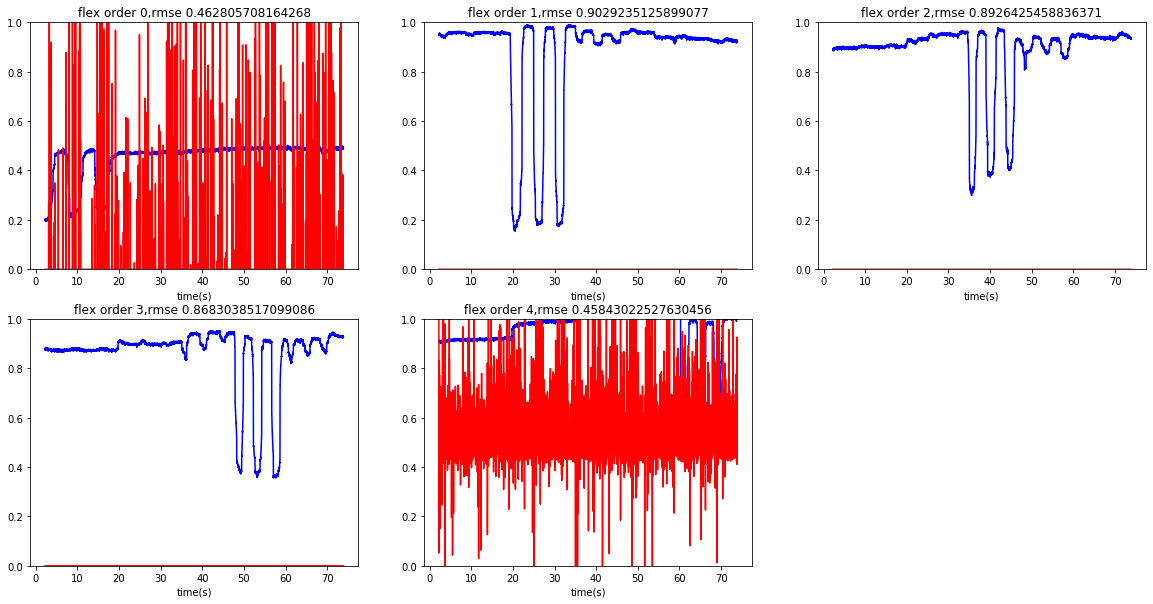

In [64]:
index = data_default_average[:,0]

label_start = 1
label = data_default_average[:, label_start:label_start+label_dim]
prediction_start = 6
prediction = data_default_average[:, prediction_start:prediction_start+label_dim]

fig = plt.figure(num=1,figsize=(20,10))
plt.figure(1)
subplot_row = 2
for i in range(label_dim):
    plt.subplot(subplot_row, int((label_dim+1)//subplot_row ), i+1)
    plt.ylim([0,1])
    plt.xlabel("time(s)")
    plt.plot(index[:], label[:,i],'b')
    plt.plot(index[:], prediction[:,i], 'r') 
    plt.title(f"flex order {i},rmse {rmse_default_average[i]}")
plt.show()

## Network-Feedback-Flex & Features

In [65]:
if flag_flex_features:
  EC = encoder(emg_dim = 8 ,flex_dim = 5)
  DL = data_loader(en = EC)
  DL.load(prediction_flex_features_file)
  data_flex_features = DL.raw

  print(f"{np.asarray(data_flex_features).shape}")
  print(f"{data_flex_features[0]}\n")

(300, 11)
[  2.99689516 207.         395.         382.         378.
 385.           0.           0.           0.           0.
   0.        ]



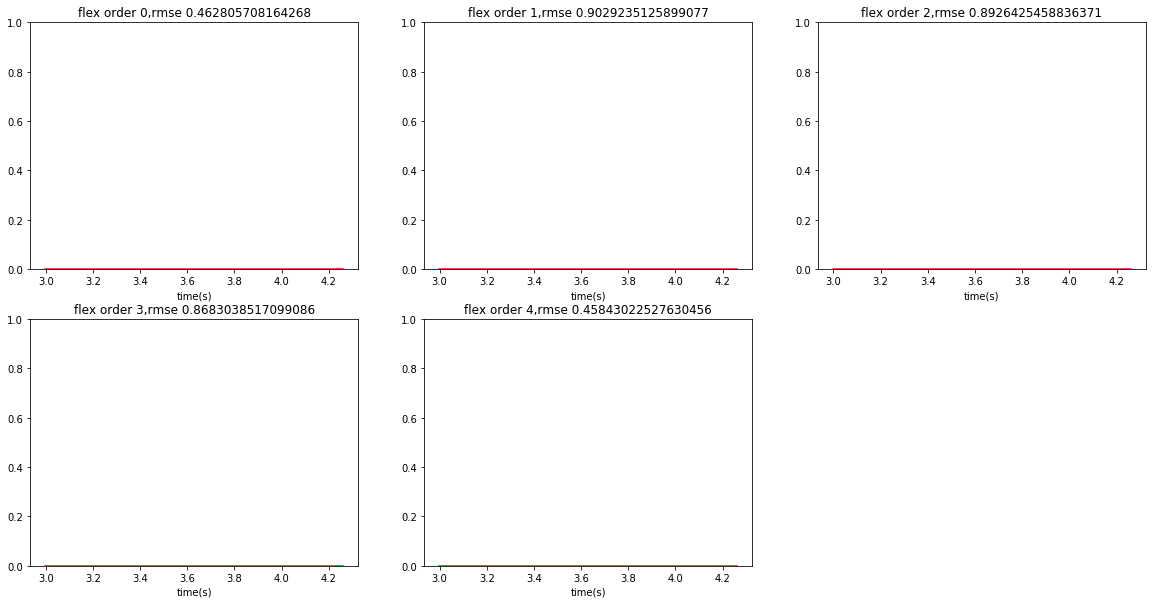

In [66]:
index = data_flex_features[:,0]

label_start = 1
label = data_flex_features[:, label_start:label_start+label_dim]
prediction_start = 6
prediction = data_flex_features[:, prediction_start:prediction_start+label_dim]

fig = plt.figure(num=1,figsize=(20,10))
plt.figure(1)
subplot_row = 2
for i in range(label_dim):
    plt.subplot(subplot_row, int((label_dim+1)//subplot_row ), i+1)
    plt.ylim([0,1])
    plt.xlabel("time(s)")
    plt.plot(index[:], label[:,i],'b')
    plt.plot(index[:], prediction[:,i], 'r') 
    plt.title(f"flex order {i},rmse {rmse_default_average[i]}")
plt.show()

## All-together

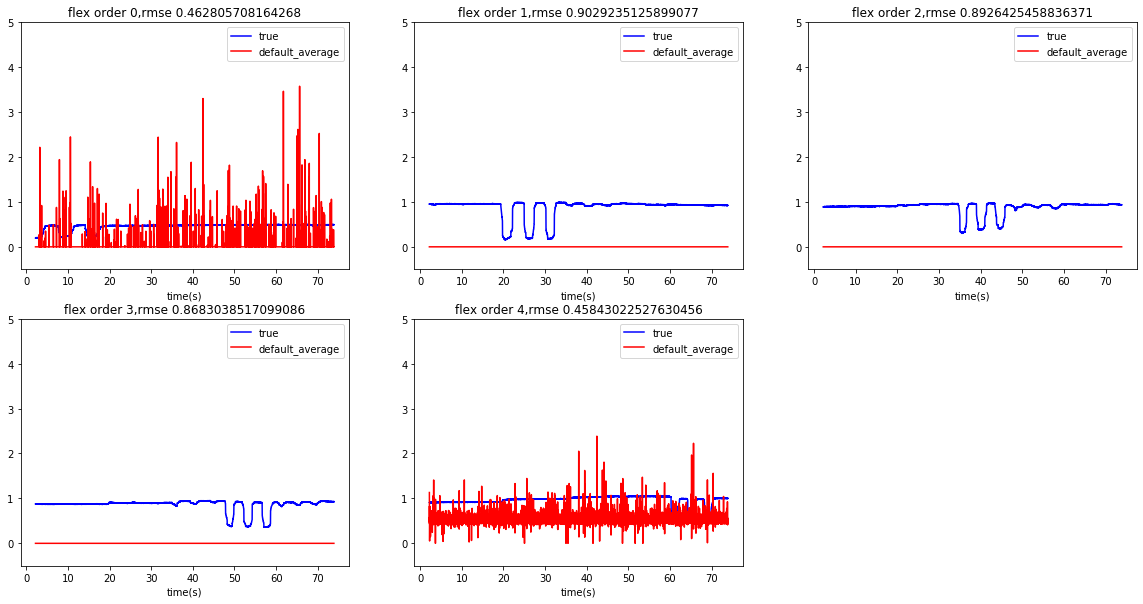

In [74]:
if(flag_default_average):
  index = data_default_average[:,0]

  label_start = 1
  label = data_default_average[:, label_start:label_start+label_dim]

  prediction_start = 6
  prediction_default_average = data_default_average[:, prediction_start:prediction_start+label_dim]

if(flag_default_features):
  if len(index) == len(data_default_features[:,0]) :
    prediction_default_features = data_default_features[:, prediction_start:prediction_start+label_dim]
  else :
    flag_default_features = False

if(flag_flex_average):
  if len(index) == len(data_flex_average[:,0]) :
    prediction_flex_average = data_flex_average[:, prediction_start:prediction_start+label_dim]
  else :
    flag_flex_average = False
    
if(flag_flex_features):
  if len(index) == len(data_flex_features[:,0]) :
    prediction_flex_features = data_flex_features[:, prediction_start:prediction_start+label_dim]
  else :
    flag_flex_features = False


fig = plt.figure(num=1,figsize=(20,10))
plt.figure(1)
subplot_row = 2
for i in range(label_dim):
    plt.subplot(subplot_row, int((label_dim+1)//subplot_row ), i+1)
    plt.ylim([-0.5,5])
    plt.xlabel("time(s)")
    plt.plot(index[:], label[:,i],'b', label = 'true')
    if(flag_default_average):
      plt.plot(index[:], prediction_default_average[:,i], 'r', label = 'default_average') 
    if(flag_default_features):
      plt.plot(index[:], prediction_default_features[:,i], 'y', label = 'default_features') 
    if(flag_flex_features):
      plt.plot(index[:], prediction_flex_features[:,i], 'g', label = 'flex_features') 
    plt.legend()
    plt.title(f"flex order {i},rmse {rmse_default_average[i]}")
plt.show()

# 3. Modification

## 3.1. Crop Abnormal Data

In [0]:
# EMG 첫번째 채널 이상한 값 없애기
class cropper:
  def __init__(self, en = encoder(), raw = []):
    self.raw = raw
    self.encoder = en
    self.data = []
    self.label = []
    self.index = []

  def delete_abnormal_sEMG(self, feature_window = 50, data = None):
    if data is not None:
      self.raw = np.asarray(data)

    res = []
    for i in range(len(self.raw)):
      if i > feature_window/2:
        mean = np.mean( self.raw[ int(i-feature_window/2) : int(i+feature_window/2), 1] )
        rms = np.sqrt( np.mean( self.raw[ int(i-feature_window/2) : int(i+feature_window/2), 1]**2 ) )

        if mean-rms*0.8 <= self.raw[i, self.encoder.index_dim] <= mean+rms*0.8 :
          res.append(self.raw[i])
        else:
          pass
    return np.asarray(res)

46583
46383


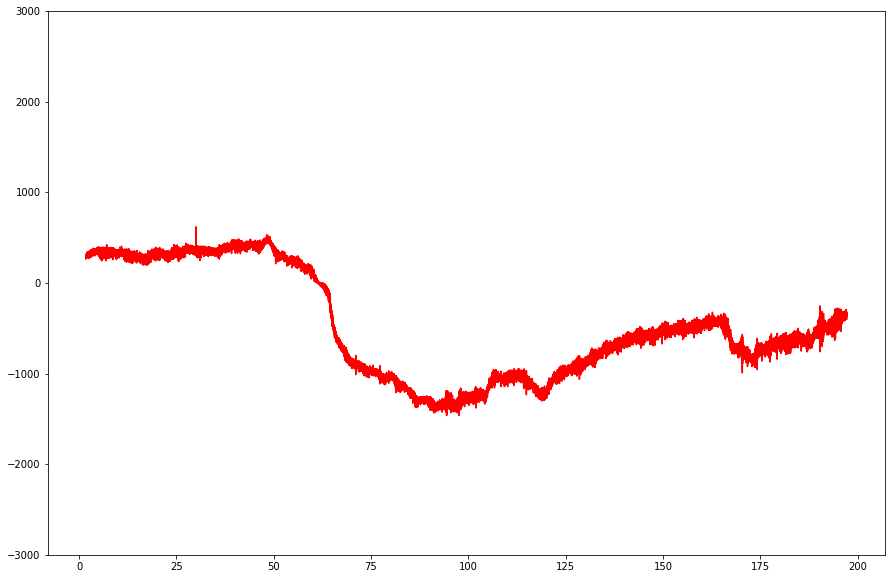

In [0]:
CR = cropper(en = EC, raw = raw_data)
crop_data = CR.delete_abnormal_sEMG()
print(len(raw_data))
print(len(crop_data))

fig = plt.figure(num=1,figsize=(15,10))
plt.figure(1)
plt.ylim([-3000,3000])
index = crop_data[:,0]
sEMGdata = crop_data[:,1]
plt.plot(index[:], sEMGdata[:],'r')

## 3.2. Filtering

In [0]:
class filtering:
    def __init__(self, en = encoder(), raw = []):
        self.raw = raw
        self.encoder = en
        self.data = []
        self.label = []
        self.index = []
        
    def butter_highpass(self, cutoff, fs, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
        return b, a

    def butter_highpass_filter(self, data, cutoff, fs, order=5):
        b, a = self.butter_highpass(cutoff, fs, order=order)
        y = signal.filtfilt(b, a, data)
        return y

    def filter_highpass(self, data = None, cutoff = 10, fps = 250):
        if data is not None:
            self.raw = np.asarray(data)
        
        filtered_data = []
        filtered_data.append( self.raw[:,0] )
        for ch in range(emg_dim):
          sEMGdata = self.raw[:,ch+1]
          sEMGfiltered = self.butter_highpass_filter(sEMGdata, cutoff, fps)
          filtered_data.append(sEMGfiltered)

        for ch in range(flex_dim):
          filtered_data.append( self.raw[:, 9+ch])

        filtered_data = np.asarray(filtered_data).transpose()
        return filtered_data

In [0]:
FT = filtering(en = EC, raw = crop_data)
filtered_data = FT.filter_highpass(cutoff = 10)

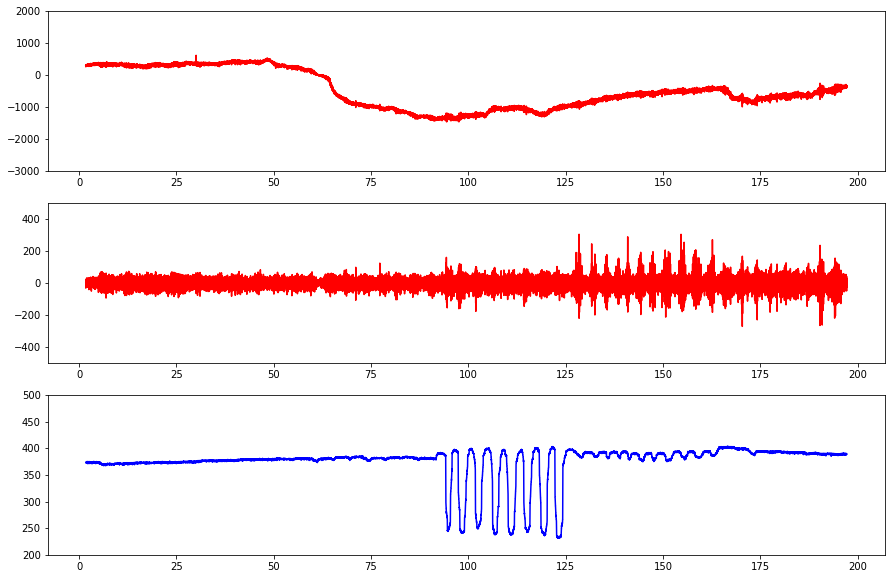

In [0]:
index = crop_data[:,0]
sEMGdata = crop_data[:,1]
flexdata = crop_data[:,11]

fig = plt.figure(num=1,figsize=(15,10))
plt.figure(1)
plt.subplot(311)
plt.ylim([-3000,2000])
plt.plot(index[:], sEMGdata[:],'r')

plt.subplot(312)
plt.ylim([-500,500])
plt.plot(index[:], filtered_data[:,2],'r')

plt.subplot(313)
plt.ylim([200,500])
plt.plot(index[:], flexdata[:],'b')

plt.show()


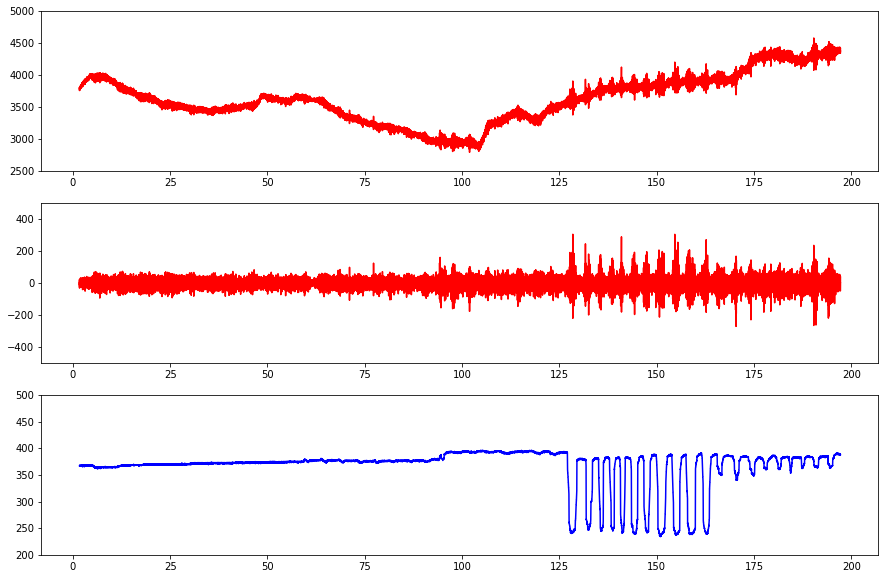

In [0]:
index = crop_data[:,0]
sEMGdata = crop_data[:,2]
flexdata = crop_data[:,12]

fig = plt.figure(num=1,figsize=(15,10))
plt.figure(1)
plt.subplot(311)
plt.ylim([2500,5000])
plt.plot(index[:], sEMGdata[:],'r')

plt.subplot(312)
plt.ylim([-500,500])
plt.plot(index[:], filtered_data[:,2],'r')

plt.subplot(313)
plt.ylim([200,500])
plt.plot(index[:], flexdata[:],'b')

plt.show()


## 3.3. Scaling


In [0]:
class scaler:
    def __init__(self, en = encoder(), raw = []):
        self.raw = raw
        self.encoder = en
        self.data = []
        self.label = []
        self.index = []
        
    def scale(self, data = None, emg_max = 187500.016, flex_max = 1024, feature_num = 5):
        if data is not None:
            self.raw = np.asarray(data)
        
        # scale EMG raw data
        #self.raw[:,self.encoder.index_dim:self.encoder.index_dim+self.encoder.emg_dim]/=emg_max
        #self.raw[:,self.encoder.index_dim:self.encoder.index_dim+self.encoder.emg_dim]=(self.raw[:,self.encoder.index_dim:self.encoder.index_dim+self.encoder.emg_dim]--0.08)/(0.08--0.08)

        # scale Flex-sensor data
        flex_start_idx = 1+self.encoder.emg_dim
        self.raw[:,flex_start_idx:]/=flex_max
        self.raw[:,flex_start_idx:]=(self.raw[:,flex_start_idx:]-0.15)/(0.4-0.15)


In [0]:
SC = scaler(en = EC)
SC.scale(filtered_data)
scale_data = SC.raw
print(scale_data[0])

[ 1.71081634e+00  6.79099729e-02  2.16016099e-01 -6.94645129e-01
 -7.92172202e-03 -6.13125606e-09 -6.13125606e-09 -6.13125606e-09
 -6.13125606e-09  6.92968750e-01  8.92187500e-01  8.57031250e-01
  8.33593750e-01  9.27343750e-01]


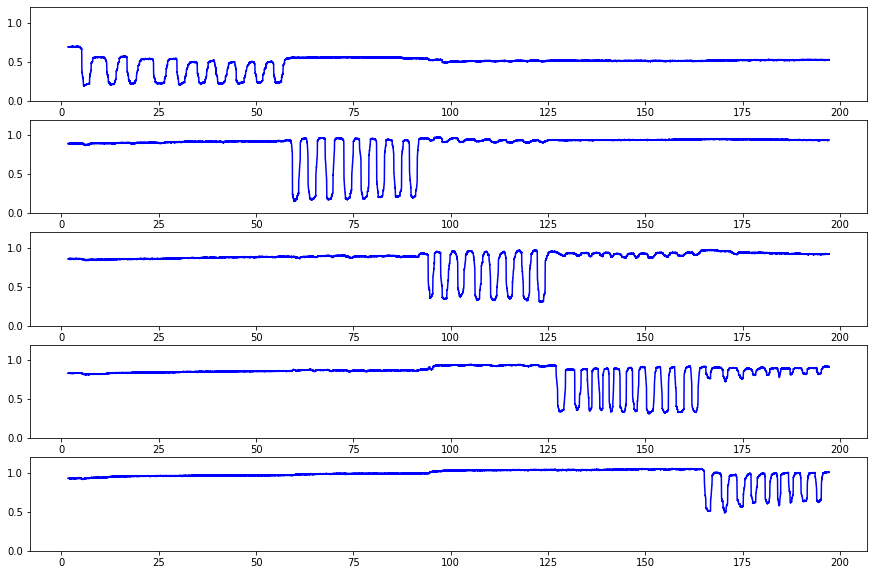

In [0]:
fig = plt.figure(num=1,figsize=(15,10))
plt.figure(1)
plt.subplot(511)
plt.ylim([0,1.2])
plt.plot(index[:], scale_data[:,9],'b')

plt.subplot(512)
plt.ylim([0,1.2])
plt.plot(index[:], scale_data[:,10],'b')

plt.subplot(513)
plt.ylim([0,1.2])
plt.plot(index[:], scale_data[:,11],'b')

plt.subplot(514)
plt.ylim([0,1.2])
plt.plot(index[:], scale_data[:,12],'b')

plt.subplot(515)
plt.ylim([0,1.2])
plt.plot(index[:], scale_data[:,13],'b')

plt.show()

## 3.4. Window Building

In [0]:
class window_builder:
	def __init__(self, en = encoder(), raw = []):
		self.raw = raw
		self.encoder = en
		self.data = []
		self.label = []
		self.index = []

	def preprocess_flex_many(self, data = None):
			if data is not None:
				self.raw = np.asarray(data)

			if (self.encoder.seq_length >= len(self.raw)):
				print(f"Error : seqence length {self.encoder.seq_length} is shorter than data count {len(self.raw)}")
				return

			dataX = []
			dataY = []
			dataT = []
			for i in range(len(self.raw) - self.encoder.seq_length + 1):
				if i > self.encoder.seq_length/2:
					_x = self.raw[i:i+self.encoder.seq_length, self.encoder.index_dim:]
					#_y는 seq_length/2 전과 seq_length/2의 미래 정보
					_y = self.raw[int(i- (self.encoder.seq_length/2)):int(i+(self.encoder.seq_length/2)), 1+self.encoder.emg_dim:]
					_t = self.raw[i:i+self.encoder.seq_length, :self.encoder.index_dim]
					dataX.append(_x)
					dataY.append(_y)
					dataT.append(_t)

			self.index = np.array(dataT)
			self.data = np.array(dataX)
			self.label = np.array(dataY)
			return self.index, self.data, self.label

In [0]:
seq_length = 2**7
EC_WB = encoder(emg_dim = 8, flex_dim = 5, seq_length = seq_length)
WB = window_builder(en = EC_WB, raw=scale_data)
trainIndex, trainData, trainLabel = WB.preprocess_flex_many(scale_data)

#print(f"Index example: {trainIndex[0].reshape(-1)}\nData example: {trainData[0]} \nLabel example: {trainLabel[0]}\n")
print(f"Data example: {len(trainData[0])}\n{trainData[0]} \nLabel example: {len(trainLabel[0])}\n{trainLabel[0]}\n")

Data example: 128
[[ -2.86726416   0.45492169   8.6759189  ...   0.85703125   0.83359375
    0.92734375]
 [-19.8868838  -19.82738371  30.361228   ...   0.85703125   0.83359375
    0.91953125]
 [ 24.52413092  19.07317    -12.83420063 ...   0.85703125   0.8375
    0.92734375]
 ...
 [  0.55157669  -0.38163091 -12.73352005 ...   0.8609375    0.83359375
    0.92734375]
 [ 15.50510322  21.32982514  12.64047049 ...   0.8609375    0.83359375
    0.93125   ]
 [  9.5395504   11.47654002  75.63753915 ...   0.8609375    0.83359375
    0.92734375]] 
Label example: 128
[[0.69296875 0.89609375 0.85703125 0.8375     0.92734375]
 [0.69296875 0.8921875  0.85703125 0.83359375 0.92734375]
 [0.6890625  0.89609375 0.85703125 0.83359375 0.92734375]
 [0.69296875 0.8921875  0.85703125 0.8375     0.92734375]
 [0.69296875 0.89609375 0.85703125 0.8375     0.92734375]
 [0.69296875 0.8921875  0.8609375  0.83359375 0.92734375]
 [0.6890625  0.8921875  0.85703125 0.8375     0.92734375]
 [0.69296875 0.89609375 0.860937